In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from scipy.stats import mannwhitneyu
from skbio.diversity.alpha import shannon

# Boxplots

In [50]:

metadata = pd.read_csv(join('..', 'Data', 'metadata.csv')).set_index('sample_id')
exist = pd.read_csv(join('..', 'Data', 'exist.csv'), index_col=0).T





control_sample = metadata[metadata['control'] == 1]
control_sample = [str(x).replace('.', '-') for x in control_sample.index.to_list()]
disease_sample = metadata[metadata['control'] == 0].index
disease_sample = [str(x).replace('.', '-') for x in disease_sample.to_list()]

exist_control = exist.loc[control_sample]
exist_disease = exist.loc[disease_sample]

Text(0, 0.5, 'Number of Significantly bound peptides per individual')

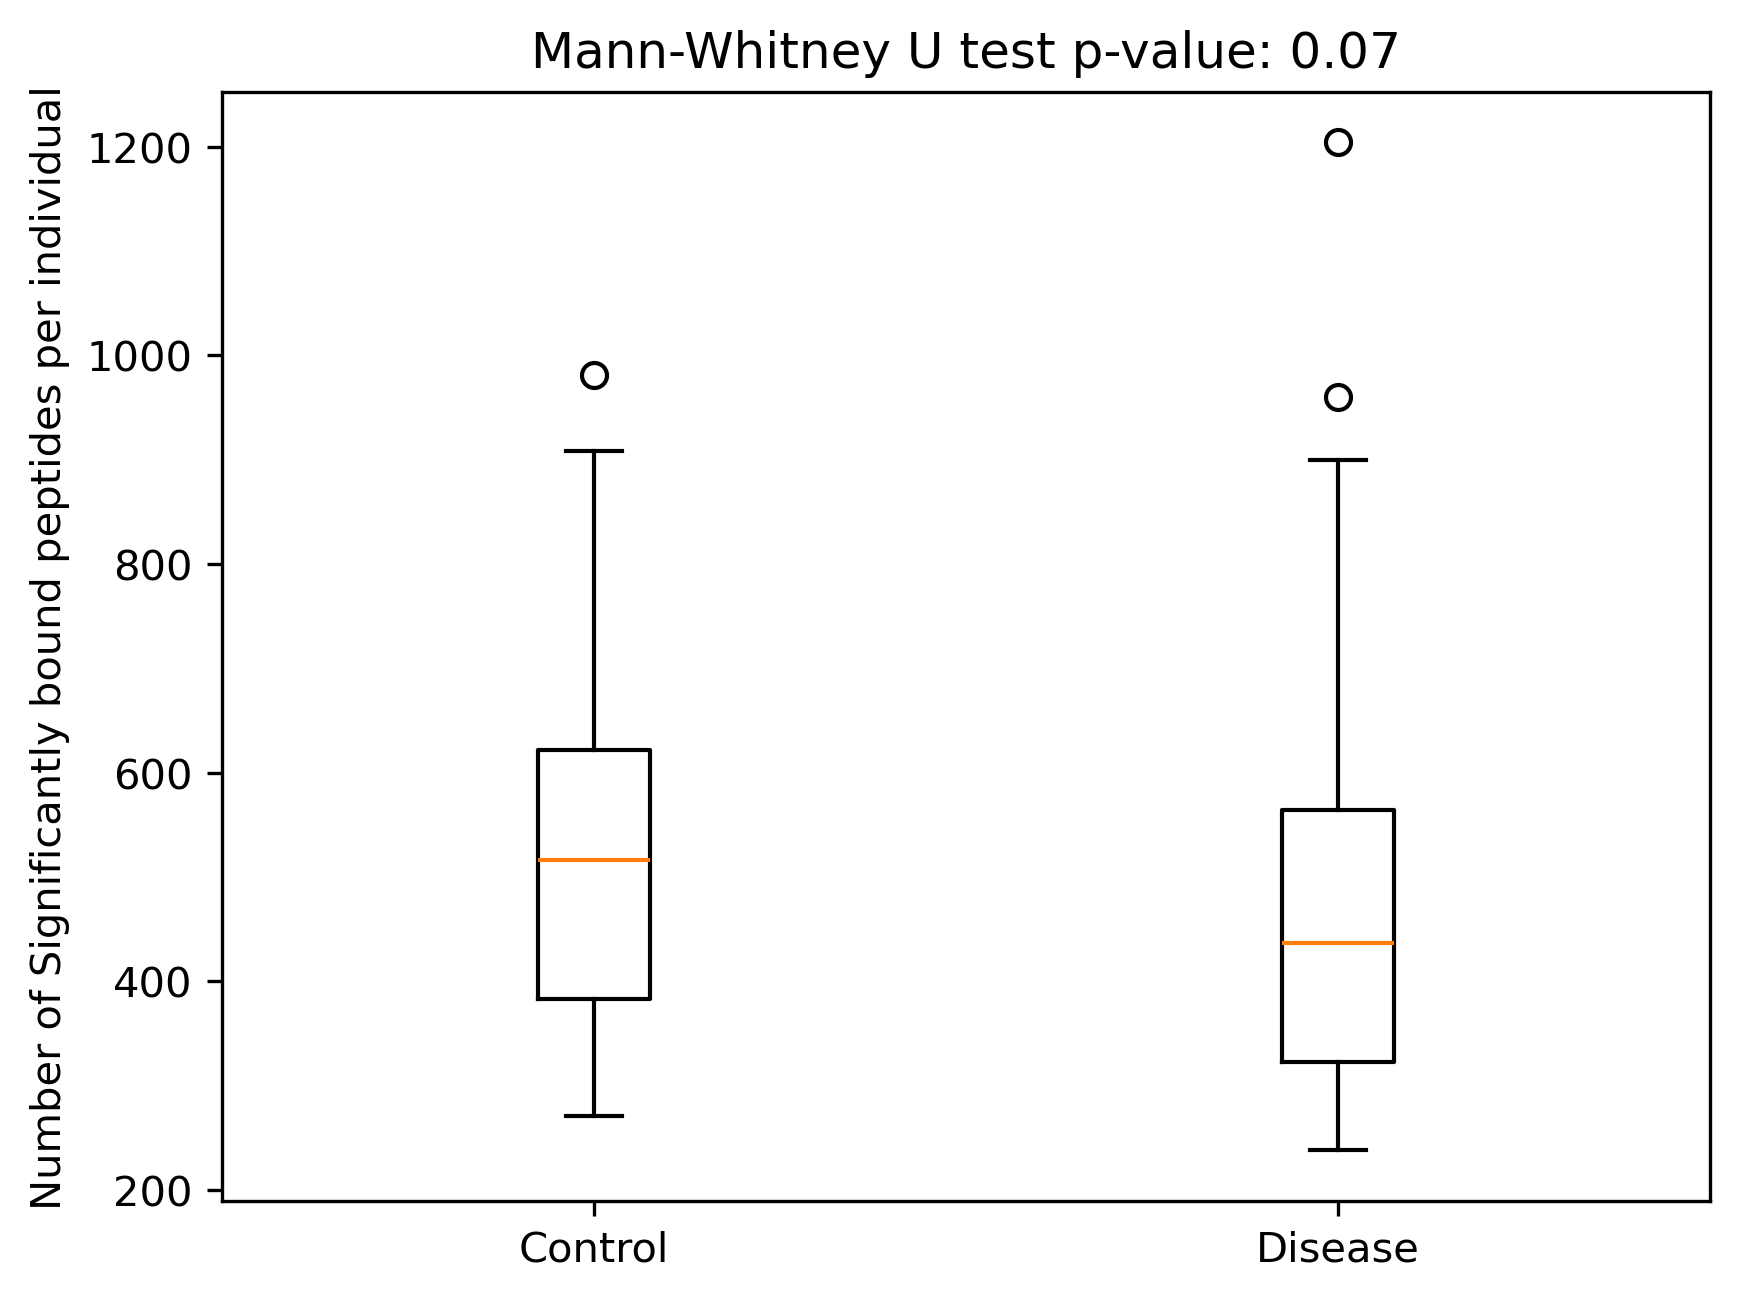

In [70]:
count_control = exist_control.sum(axis = 1)
count_disease = exist_disease.sum(axis = 1)
mwu = mannwhitneyu(count_control, count_disease, alternative='greater')
plt.figure(dpi = 300)
plt.boxplot([count_control, count_disease], tick_labels = ['Control', 'Disease'])
plt.title(f'Mann-Whitney U test p-value: {mwu.pvalue:.2f}')
plt.ylabel('Number of Significantly bound peptides per individual')

Text(0, 0.5, "Shannon's Diversity Index per individual")

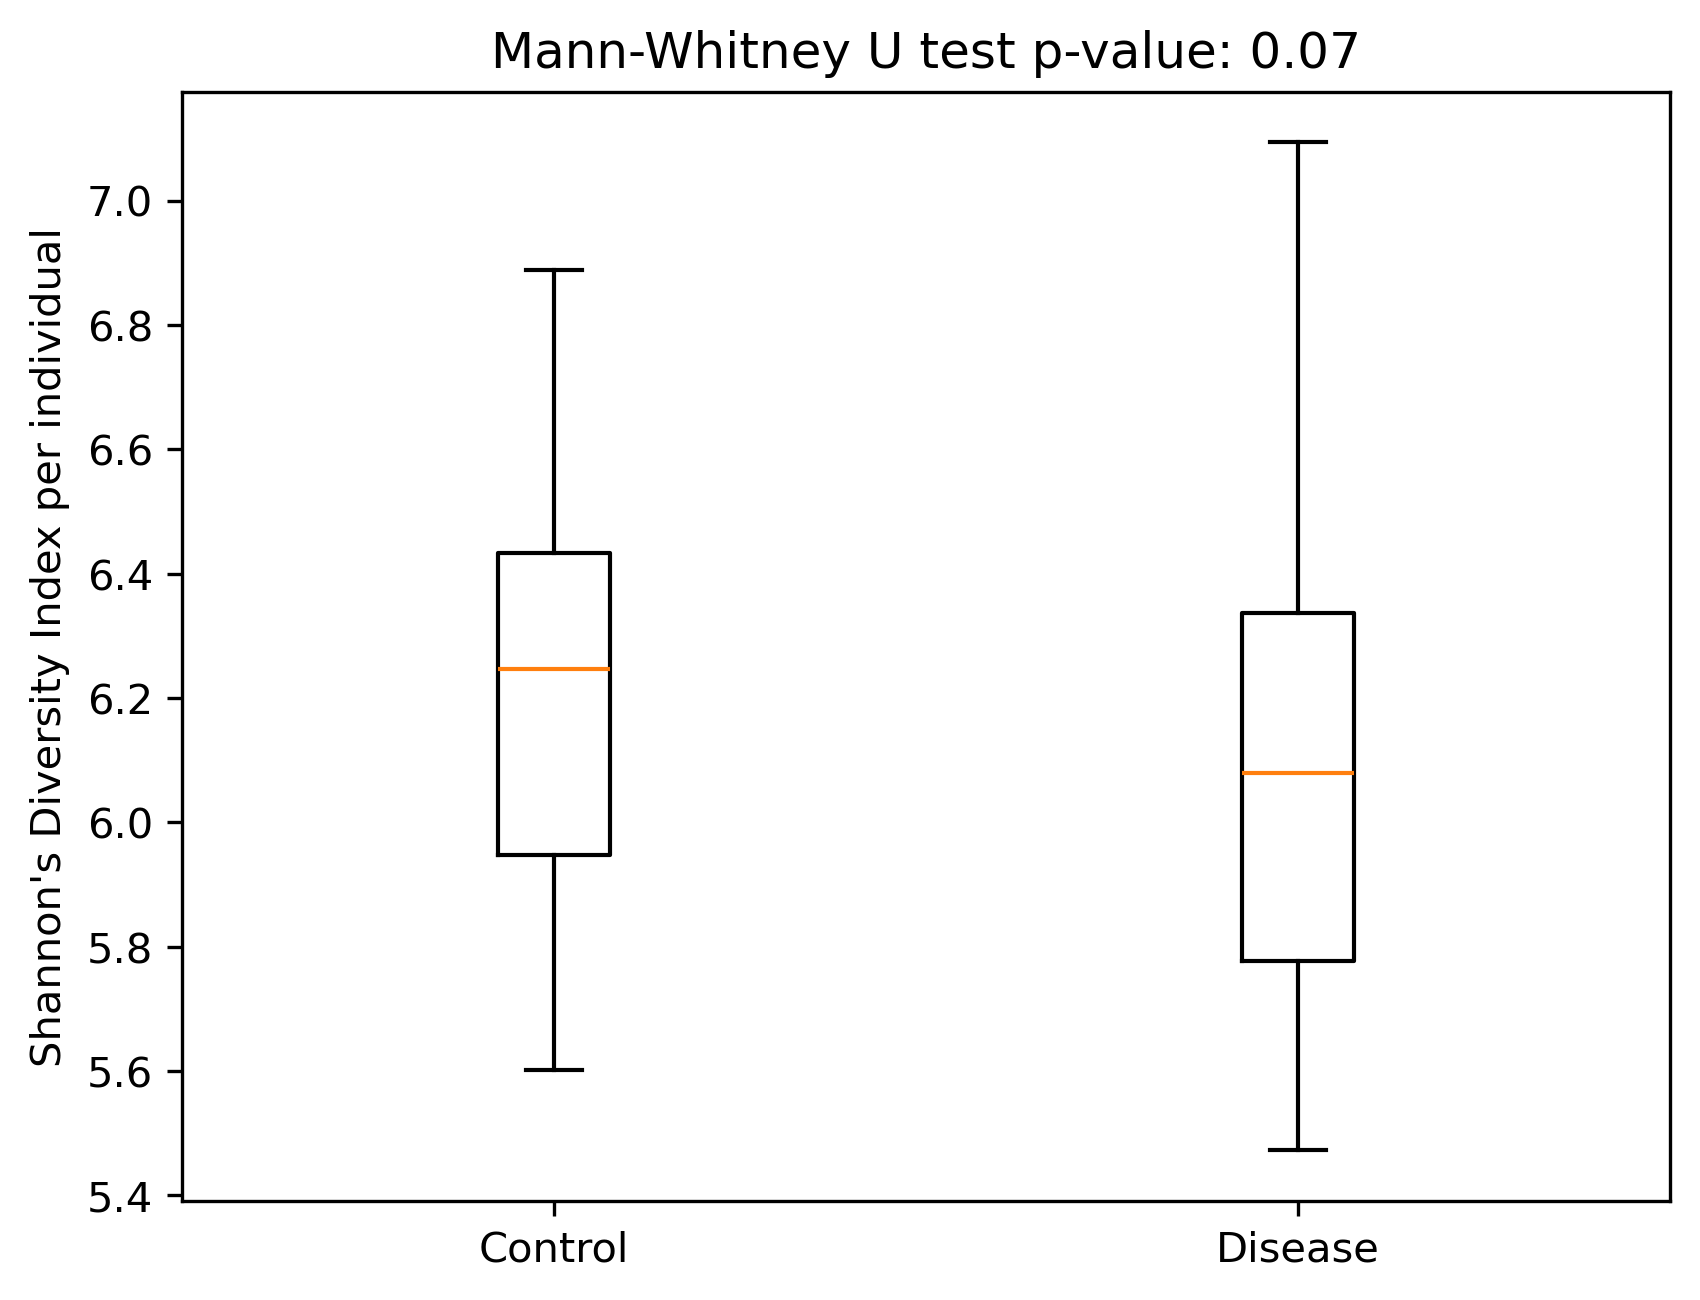

In [71]:
shannon_control = exist_control.apply(shannon, axis = 1)
shannon_disease = exist_disease.apply(shannon, axis = 1)
mwu_shannon = mannwhitneyu(shannon_control, shannon_disease, alternative='greater')
plt.figure(dpi = 300)
plt.boxplot([shannon_control, shannon_disease], tick_labels = ['Control', 'Disease'])
plt.title(f'Mann-Whitney U test p-value: {mwu_shannon.pvalue:.2f}')
plt.ylabel("Shannon's Diversity Index per individual")

In [59]:
shannon_control

R33P01_01_N003_IBD-Chile_A_T_C2    5.855072
R33P01_02_N006_IBD-Chile_A_T_C2    5.929589
R33P01_03_N008_IBD-Chile_A_T_C2    5.602119
R33P01_04_N011_IBD-Chile_A_T_C2    6.352629
R33P01_05_N013_IBD-Chile_A_T_C2    5.963579
R33P01_06_N014_IBD-Chile_A_T_C2    6.169611
R33P01_07_N015_IBD-Chile_A_T_C2    5.976351
R33P01_08_N018_IBD-Chile_A_T_C2    6.461468
R33P01_09_N020_IBD-Chile_A_T_C2    5.814131
R33P01_10_N021_IBD-Chile_A_T_C2    6.144186
R33P01_11_N022_IBD-Chile_A_T_C2    6.423247
R33P01_12_N023_IBD-Chile_A_T_C2    6.888572
R33P01_13_N025_IBD-Chile_A_T_C2    6.013715
R33P01_14_N027_IBD-Chile_A_T_C2    6.396930
R33P01_15_N029_IBD-Chile_A_T_C2    6.228511
R33P01_16_N030_IBD-Chile_A_T_C2    6.496775
R33P01_17_N031_IBD-Chile_A_T_C2    6.329721
R33P01_18_N032_IBD-Chile_A_T_C2    6.811244
R33P01_19_N036_IBD-Chile_A_T_C2    6.186209
R33P01_20_N037_IBD-Chile_A_T_C2    5.652489
R33P01_21_N038_IBD-Chile_A_T_C2    6.311735
R33P01_22_N040_IBD-Chile_A_T_C2    6.559615
R33P01_23_N042_IBD-Chile_A_T_C2 

# percentage

Text(0.5, 1.0, 'Percentage of Significantly bound peptides')

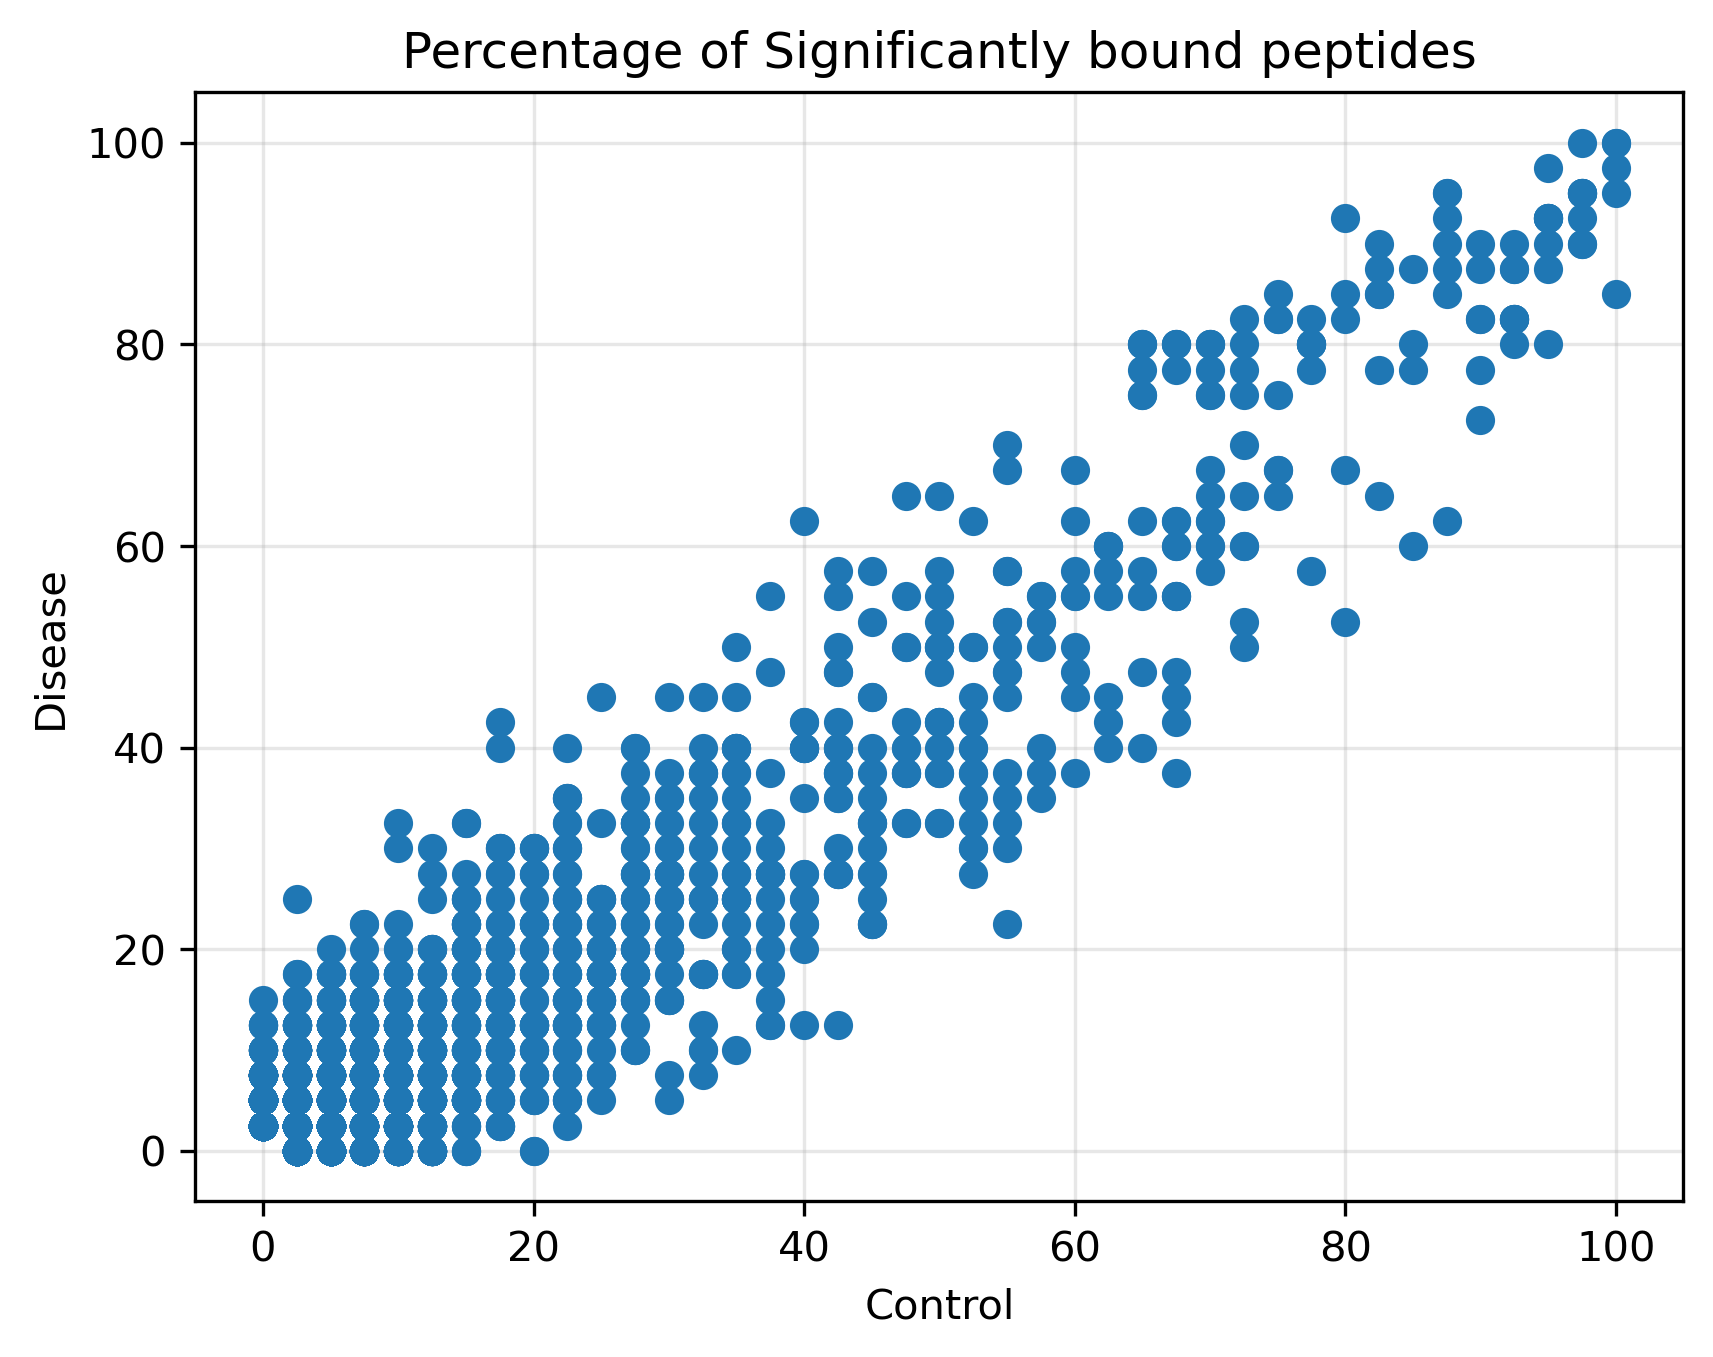

In [79]:
percentage_control = exist_control.sum(axis = 0) / exist_control.shape[0] * 100
percentage_disease = exist_disease.sum(axis = 0) / exist_disease.shape[0] * 100

plt.figure(dpi = 300)
plt.grid(zorder = 0, alpha = 0.3)
plt.scatter(percentage_control, percentage_disease, zorder = 3)
plt.xlabel('Control')
plt.ylabel('Disease')
plt.title('Percentage of Significantly bound peptides')

In [75]:
percentage_control

peptide_name
agilent_10        2.5
agilent_100076    2.5
agilent_100147    0.0
agilent_100176    0.0
agilent_100204    2.5
                 ... 
twist_99816       2.5
twist_99830       0.0
twist_99880       0.0
twist_99911       0.0
twist_99954       0.0
Length: 13106, dtype: float64